In [2]:
import random as rd
from typing import Tuple
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Q2

Com base na seção 9.4 do livro "CHAOS: An Introduction to Dynamical Systems, Alligood, Sauer and Yorke, Springer, 1996", estudaremos o circuito de Chua, que é utilizado em simulações numéricas e também em experimentos com circuitos reais. O sistema de equações de Chua é:
$$
\Dot{x} = c_1(y-x-g(x))
$$
$$
\Dot{y} = c_2(x-y+z)
$$
$$
\Dot{z} = -c_3y
$$
com:
$$
g(x)=
  \begin{cases}
    m_1x + m_1 - m_0      & \quad \text{se } x \leq -1\\
    m_0x      & \quad \text{se } -1 \leq x \leq 1\\
    m_1x + m_0 - m_1      & \quad \text{se } 1 \leq x\\
  \end{cases}
$$

Iremos reproduzir numericamente os atratores da Fig.9.10 do livro, cujo os parâmetros são:$c_1 = 15.6$, $c_2=1$, $m_0=-8/7$, $m_1=-5/7$. Na figura, o parâmetro $c_3$ foi sendo modificado.



In [3]:
def chua (x:float,y:float,z:float,c3: float) -> Tuple[float,float,float]:
    if (x<= -1):
        g = -5*x/7 -5/7 + 8/7
    elif (-1<x<=1):
        g = -8*x/7
    else:
        g = -5*x/7 -8/7 + 5/7
    
    xt = 15.6*(y-x-g)
    yt = 1*(x-y+z)
    zt = -c3*y
    
    return (xt,yt,zt)

A partir dessa equação, iremos usar o método de rk4 partindo de condições iniciais para fazer os cálculos numéricos desse sistema de equações:


In [4]:
def rk4 (x: float, y: float, z: float, c3: float, n: int,  dt: float) -> Tuple[float,float,float]:
    for i in range (n):
        (xa,ya,za) = chua(x,y,z,c3)
        (xb,yb,zb) = chua(x+dt*0.5*xa,y+dt*0.5*ya,z+dt*0.5*za,c3)
        (xc,yc,zc) = chua(x+dt*0.5*xb,y+dt*0.5*yb,z+dt*0.5*zb,c3)
        (xd,yd,zd) = chua(x+dt*xc,y+dt*yc,z+dt*zc,c3)
        x = x + dt/6*(xa + 2*xb + 2*xc + xd)
        y = y + dt/6*(ya + 2*yb + 2*yc + yd)
        z = z + dt/6*(za + 2*zb + 2*zc + zd)
        yield (x,y,z)

#dt = tamanho do passo de integração
#n = número de pontos (x,y,z) que são calculados

In [34]:
def plot3d (c3:float, n,n_inic, dt,N,s):
    print(c3)
    rd.seed(s)
    fig = plt.figure ( figsize = (8.5,8.5))
    ax = fig.gca ( projection = '3d' )
    for i in range(N):
        x0 = rd.uniform(-1,1) 
        y0 = rd.uniform(-1,1)
        z0 = rd.uniform(-1,1)
        (X,Y,Z) = zip(*rk4(x0,y0,z0,c3,n,dt))
        ax.plot ( X[n_inic:], Y[n_inic:], Z[n_inic:], linewidth = 0.5)
    ax.grid ( True )
    ax.set_xlabel ( 'x' )
    ax.set_ylabel ( 'y' )
    ax.set_zlabel ( 'z' )
    ax.set_title ( 'Atratores do circuito de Chua com c = %1.2f' % c3 )
    plt.show ( )
    return 

50


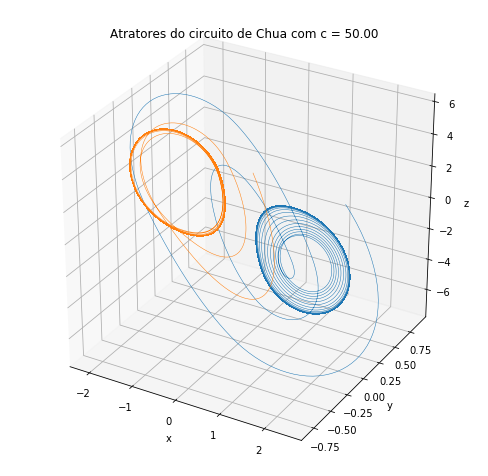

50


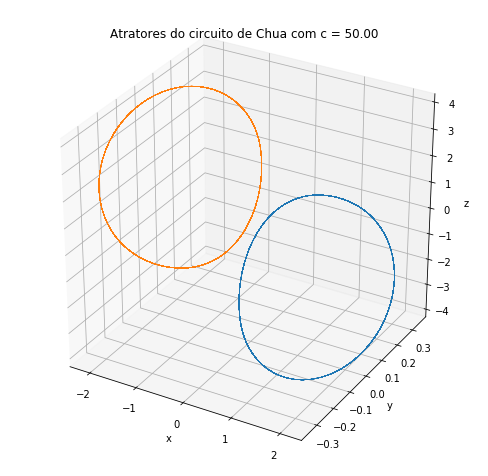

In [36]:
c3=50 #parameter c3 that is being changed
s=2 #seed for reproductiveness of the simulation
n = 50000 #number of time points for simulation
dt = 0.01 #interval between points for numerical calculus
N = 2 #number of initial points
n_inic = 40000 # number of points that are disconsidered for the plot
plot3d(c3,n,0,dt,N,s)
plot3d(c3,n,n_inic,dt,N,s)

35


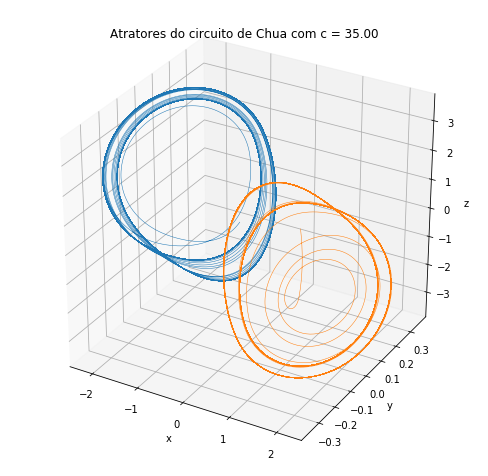

35


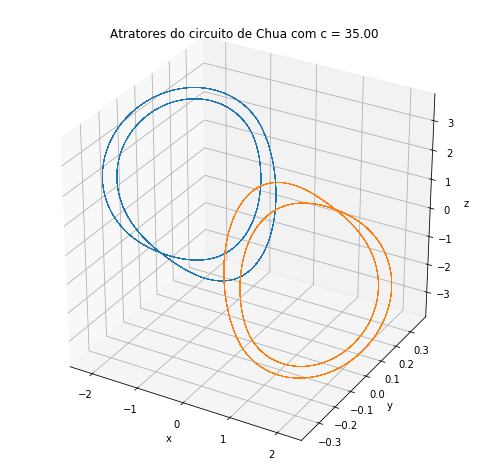

In [39]:
c3=35 #parameter c3 that is being changed
s=3 #seed for reproductiveness of the simulation
n = 50000 #number of time points for simulation
dt = 0.01 #interval between points for numerical calculus
N = 2 #number of initial points
n_inic = 40000 # number of points that are disconsidered for the plot
plot3d(c3,n,0,dt,N,s)
plot3d(c3,n,n_inic,dt,N,s)

33.8


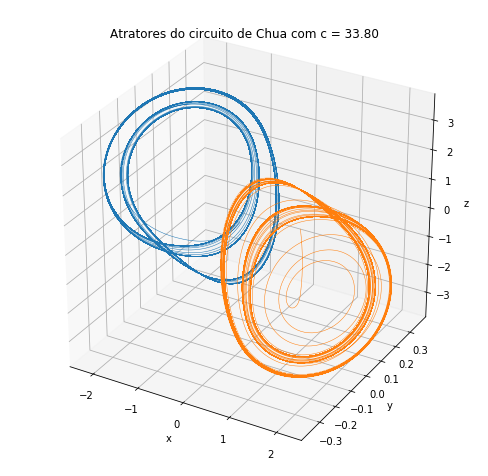

33.8


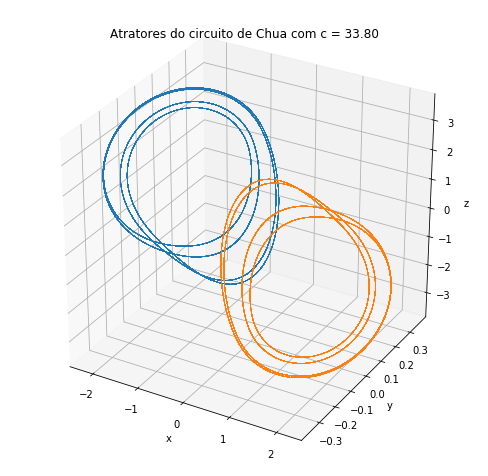

In [41]:
c3=33.8 #parameter c3 that is being changed
s=3 #seed for reproductiveness of the simulation
n = 60000 #number of time points for simulation
dt = 0.01 #interval between points for numerical calculus
N = 2 #number of initial points
n_inic = 40000 # number of points that are disconsidered for the plot
plot3d(c3,n,0,dt,N,s)
plot3d(c3,n,n_inic,dt,N,s)

33.6


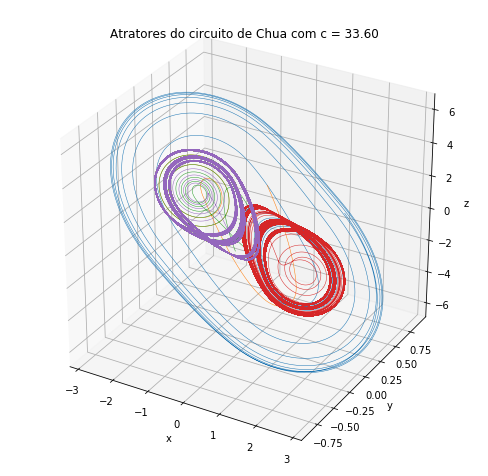

33.6


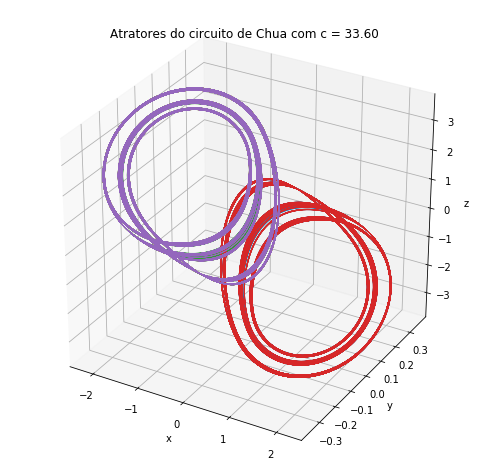

In [44]:
c3=33.6 #parameter c3 that is being changed
s=2 #seed for reproductiveness of the simulation
n = 60000 #number of time points for simulation
dt = 0.01 #interval between points for numerical calculus
N = 5 #number of initial points
n_inic = 40000 # number of points that are disconsidered for the plot
plot3d(c3,n,0,dt,N,s)
plot3d(c3,n,n_inic,dt,N,s)

33


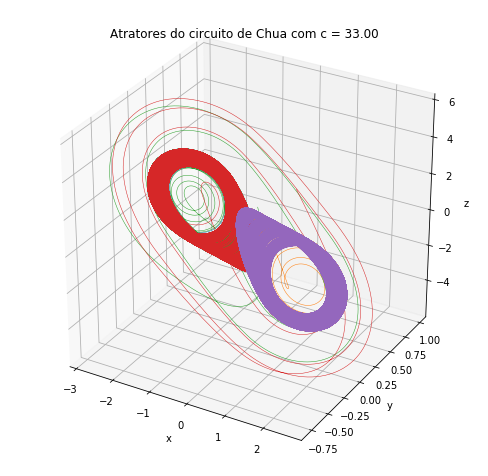

33


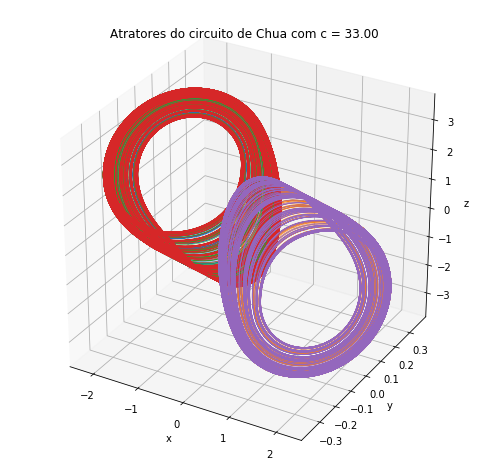

In [46]:
c3=33 #parameter c3 that is being changed
s=3 #seed for reproductiveness of the simulation
n = 60000 #number of time points for simulation
dt = 0.01 #interval between points for numerical calculus
N = 5 #number of initial points
n_inic = 40000 # number of points that are disconsidered for the plot
plot3d(c3,n,0,dt,N,s)
plot3d(c3,n,n_inic,dt,N,s)

25.58


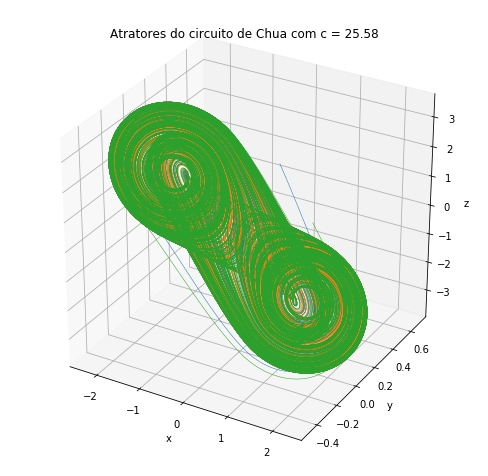

25.58


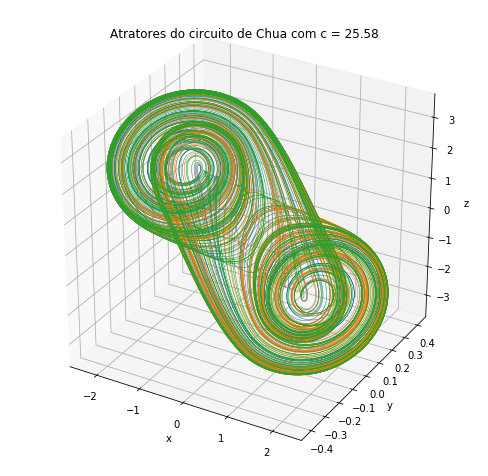

In [55]:
c3=25.58 #parameter c3 that is being changed
s=1 #seed for reproductiveness of the simulation
n = 60000 #number of time points for simulation
dt = 0.01 #interval between points for numerical calculus
N = 3 #number of initial points
n_inic = 40000 # number of points that are disconsidered for the plot
plot3d(c3,n,0,dt,N,s)
plot3d(c3,n,n_inic,dt,N,s)